# Airline Flight Delay Analysis (USA)

**Ishak Islam** | UMID28072552431 | Unified Mentor Internship

---

This notebook analyzes airline flight delays in the United States using data from the Bureau of Transportation Statistics (BTS). The analysis covers delay patterns by airport, time periods, and delay causes.

## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Define paths
DATA_DIR = Path('../data')
VIZ_DIR = Path('../visualizations')
TABLEAU_DIR = Path('../tableau')

VIZ_DIR.mkdir(exist_ok=True)
TABLEAU_DIR.mkdir(exist_ok=True)

# Color palette
COLORS = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22', '#34495e']

print('Setup complete!')

Setup complete!


## 2. Load Data

**Dataset Source:** CORGIS Dataset Project (Bureau of Transportation Statistics)

https://corgis-edu.github.io/corgis/csv/airlines/

Monthly aggregated flight delay data by US airport from 2003-2016.

In [2]:
# Load flight data
try:
    df = pd.read_csv(DATA_DIR / 'airlines.csv')
    print(f'Loaded flight data: {df.shape}')
except FileNotFoundError:
    print('File not found: airlines.csv')
    print('Download from: https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv')
    df = None

Loaded flight data: (4408, 24)


## 3. Data Exploration

In [3]:
# Preview the data
if df is not None:
    print('Flight Data Preview:')
    print(f'Columns: {df.columns.tolist()}')
    display(df.head())

Flight Data Preview:
Columns: ['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month', 'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier', 'Statistics.# of Delays.Late Aircraft', 'Statistics.# of Delays.National Aviation System', 'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather', 'Statistics.Carriers.Names', 'Statistics.Carriers.Total', 'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed', 'Statistics.Flights.Diverted', 'Statistics.Flights.On Time', 'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier', 'Statistics.Minutes Delayed.Late Aircraft', 'Statistics.Minutes Delayed.National Aviation System', 'Statistics.Minutes Delayed.Security', 'Statistics.Minutes Delayed.Total', 'Statistics.Minutes Delayed.Weather']


,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [4]:
# Check data types and missing values
if df is not None:
    print('Data Info:')
    print(df.info())
    print(f'\nYears covered: {df["Time.Year"].min()} - {df["Time.Year"].max()}')
    print(f'Number of airports: {df["Airport.Code"].nunique()}')

Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Airport.Code                                         4408 non-null   str  
 1   Airport.Name                                         4408 non-null   str  
 2   Time.Label                                           4408 non-null   str  
 3   Time.Month                                           4408 non-null   int64
 4   Time.Month Name                                      4408 non-null   str  
 5   Time.Year                                            4408 non-null   int64
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64
 9   Statisti

In [5]:
# Basic statistics
if df is not None:
    print('Basic Statistics:')
    display(df.describe())

Basic Statistics:


,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.578947,2009.243421,574.632486,789.078947,954.580309,5.575544,78.216878,12.253403,213.558076,2402.000454,27.880898,9254.420826,11897.860254,35021.369782,49410.274955,45077.107985,211.769737,135997.535163,6276.982759
std,3.457890,3.667475,329.616475,561.798420,921.907801,6.007046,75.181726,2.289861,288.873477,1710.947613,36.356399,5337.214211,6861.691876,24327.721037,38750.017050,57636.745683,257.174789,113972.276370,6477.417169
min,1.000000,2003.000000,112.000000,86.000000,61.000000,-1.000000,1.000000,3.000000,3.000000,283.000000,0.000000,2003.000000,2533.000000,6016.000000,5121.000000,2183.000000,0.000000,14752.000000,46.000000
25%,4.000000,2006.000000,358.000000,425.000000,399.000000,2.000000,33.000000,11.000000,58.000000,1298.750000,8.000000,5708.750000,7400.000000,19530.750000,25084.250000,14389.000000,65.000000,65444.750000,2310.750000
50%,7.000000,2009.000000,476.000000,618.500000,667.500000,4.000000,58.000000,12.000000,123.000000,1899.000000,15.000000,7477.000000,9739.500000,27782.000000,37483.000000,25762.000000,141.000000,100711.000000,4298.500000
75%,10.000000,2012.000000,692.000000,959.000000,1166.000000,7.000000,98.000000,14.000000,250.000000,2950.000000,32.000000,10991.500000,13842.500000,41606.000000,59951.250000,50362.000000,274.000000,164294.750000,7846.000000
max,12.000000,2016.000000,3087.000000,4483.000000,9066.000000,94.000000,812.000000,18.000000,3680.000000,13699.000000,442.000000,31468.000000,38241.000000,220796.000000,345456.000000,602479.000000,4949.000000,989367.000000,76770.000000


## 4. Data Cleaning

In [6]:
def clean_flight_data(df):
    """Clean and prepare flight data for analysis."""
    if df is None:
        return None
    
    df_clean = df.copy()
    
    # Rename columns for easier access
    column_mapping = {
        'Airport.Code': 'AIRPORT_CODE',
        'Airport.Name': 'AIRPORT_NAME',
        'Time.Label': 'TIME_LABEL',
        'Time.Month': 'MONTH',
        'Time.Month Name': 'MONTH_NAME',
        'Time.Year': 'YEAR',
        'Statistics.# of Delays.Carrier': 'CARRIER_DELAY_COUNT',
        'Statistics.# of Delays.Late Aircraft': 'LATE_AIRCRAFT_DELAY_COUNT',
        'Statistics.# of Delays.National Aviation System': 'NAS_DELAY_COUNT',
        'Statistics.# of Delays.Security': 'SECURITY_DELAY_COUNT',
        'Statistics.# of Delays.Weather': 'WEATHER_DELAY_COUNT',
        'Statistics.Carriers.Names': 'CARRIERS',
        'Statistics.Carriers.Total': 'CARRIER_COUNT',
        'Statistics.Flights.Cancelled': 'CANCELLED',
        'Statistics.Flights.Delayed': 'DELAYED',
        'Statistics.Flights.Diverted': 'DIVERTED',
        'Statistics.Flights.On Time': 'ON_TIME',
        'Statistics.Flights.Total': 'TOTAL_FLIGHTS',
        'Statistics.Minutes Delayed.Carrier': 'CARRIER_DELAY_MIN',
        'Statistics.Minutes Delayed.Late Aircraft': 'LATE_AIRCRAFT_DELAY_MIN',
        'Statistics.Minutes Delayed.National Aviation System': 'NAS_DELAY_MIN',
        'Statistics.Minutes Delayed.Security': 'SECURITY_DELAY_MIN',
        'Statistics.Minutes Delayed.Total': 'TOTAL_DELAY_MIN',
        'Statistics.Minutes Delayed.Weather': 'WEATHER_DELAY_MIN'
    }
    
    df_clean = df_clean.rename(columns=column_mapping)
    
    # Calculate delay rate
    df_clean['DELAY_RATE'] = (df_clean['DELAYED'] / df_clean['TOTAL_FLIGHTS'] * 100).round(2)
    
    # Calculate total delay count
    df_clean['TOTAL_DELAY_COUNT'] = (df_clean['CARRIER_DELAY_COUNT'] + 
                                      df_clean['LATE_AIRCRAFT_DELAY_COUNT'] + 
                                      df_clean['NAS_DELAY_COUNT'] + 
                                      df_clean['SECURITY_DELAY_COUNT'] + 
                                      df_clean['WEATHER_DELAY_COUNT'])
    
    return df_clean

# Clean the data
df_clean = clean_flight_data(df)

if df_clean is not None:
    print(f'Cleaned data shape: {df_clean.shape}')
    print(f'\nYears in data: {sorted(df_clean["YEAR"].unique())}')
    print(f'Airports: {df_clean["AIRPORT_CODE"].nunique()}')

Cleaned data shape: (4408, 26)

Years in data: [np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016)]
Airports: 29


## 5. Analysis and Statistics

In [7]:
# Overall statistics
if df_clean is not None:
    print('Overall Flight Statistics (2003-2016):')
    print('-' * 50)
    
    total_flights = df_clean['TOTAL_FLIGHTS'].sum()
    total_delayed = df_clean['DELAYED'].sum()
    total_cancelled = df_clean['CANCELLED'].sum()
    total_on_time = df_clean['ON_TIME'].sum()
    
    print(f'Total flights: {total_flights:,}')
    print(f'On-time flights: {total_on_time:,} ({total_on_time/total_flights*100:.1f}%)')
    print(f'Delayed flights: {total_delayed:,} ({total_delayed/total_flights*100:.1f}%)')
    print(f'Cancelled flights: {total_cancelled:,} ({total_cancelled/total_flights*100:.1f}%)')
    print(f'\nTotal delay minutes: {df_clean["TOTAL_DELAY_MIN"].sum():,.0f}')

Overall Flight Statistics (2003-2016):
--------------------------------------------------
Total flights: 52,445,768
On-time flights: 40,793,487 (77.8%)
Delayed flights: 10,588,018 (20.2%)
Cancelled flights: 941,364 (1.8%)

Total delay minutes: 599,477,135


In [8]:
# Yearly statistics
if df_clean is not None:
    print('Yearly Statistics:')
    print('-' * 70)
    
    yearly_stats = df_clean.groupby('YEAR').agg({
        'TOTAL_FLIGHTS': 'sum',
        'DELAYED': 'sum',
        'CANCELLED': 'sum',
        'ON_TIME': 'sum',
        'TOTAL_DELAY_MIN': 'sum'
    })
    
    yearly_stats['Delay Rate (%)'] = (yearly_stats['DELAYED'] / yearly_stats['TOTAL_FLIGHTS'] * 100).round(1)
    yearly_stats['Cancel Rate (%)'] = (yearly_stats['CANCELLED'] / yearly_stats['TOTAL_FLIGHTS'] * 100).round(1)
    yearly_stats = yearly_stats.rename(columns={'TOTAL_FLIGHTS': 'Flights', 'DELAYED': 'Delayed', 'CANCELLED': 'Cancelled'})
    
    display(yearly_stats[['Flights', 'Delayed', 'Delay Rate (%)', 'Cancelled', 'Cancel Rate (%)']])

Yearly Statistics:
----------------------------------------------------------------------


,Flights,Delayed,Delay Rate (%),Cancelled,Cancel Rate (%)
YEAR,,,,,
2003,2373106,411570,17.3,34598,1.5
2004,4344735,880677,20.3,77940,1.8
2005,4373522,925578,21.2,83188,1.9
2006,4437952,1024612,23.1,78475,1.8
2007,4538488,1129439,24.9,102665,2.3
2008,4307649,965136,22.4,87650,2.0
2009,4038900,787472,19.5,58341,1.4
2010,4050772,732445,18.1,75018,1.9
2011,3923295,715560,18.2,77467,2.0


In [9]:
# Monthly statistics (aggregated across all years)
if df_clean is not None:
    print('Monthly Statistics (All Years Combined):')
    print('-' * 50)
    
    monthly_stats = df_clean.groupby('MONTH').agg({
        'TOTAL_FLIGHTS': 'sum',
        'DELAYED': 'sum',
        'CANCELLED': 'sum'
    })
    
    monthly_stats['Delay Rate'] = (monthly_stats['DELAYED'] / monthly_stats['TOTAL_FLIGHTS'] * 100).round(1)
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_stats.index = [month_names[i-1] for i in monthly_stats.index]
    monthly_stats.columns = ['Flights', 'Delayed', 'Cancelled', 'Delay Rate (%)']
    
    display(monthly_stats)

Monthly Statistics (All Years Combined):
--------------------------------------------------


,Flights,Delayed,Cancelled,Delay Rate (%)
Jan,4363555,908789,128455,20.8
Feb,3761574,801497,125630,21.3
Mar,4275438,874674,77751,20.5
Apr,4128093,767134,55172,18.6
May,4238046,817071,53908,19.3
Jun,4588297,1085637,78791,23.7
Jul,4754762,1084630,79194,22.8
Aug,4726347,963240,74052,20.4
Sep,4336206,668669,59599,15.4
Oct,4524038,783858,56295,17.3


In [10]:
# Top 15 busiest airports
if df_clean is not None:
    print('Top 15 Busiest Airports (2003-2016):')
    print('-' * 60)
    
    airport_stats = df_clean.groupby(['AIRPORT_CODE', 'AIRPORT_NAME']).agg({
        'TOTAL_FLIGHTS': 'sum',
        'DELAYED': 'sum',
        'CANCELLED': 'sum'
    }).reset_index()
    
    airport_stats['Delay Rate'] = (airport_stats['DELAYED'] / airport_stats['TOTAL_FLIGHTS'] * 100).round(1)
    airport_stats = airport_stats.sort_values('TOTAL_FLIGHTS', ascending=False).head(15)
    
    display(airport_stats[['AIRPORT_CODE', 'TOTAL_FLIGHTS', 'DELAYED', 'Delay Rate']].rename(
        columns={'AIRPORT_CODE': 'Airport', 'TOTAL_FLIGHTS': 'Total Flights', 'DELAYED': 'Delayed', 'Delay Rate': 'Delay Rate (%)'}
    ))

Top 15 Busiest Airports (2003-2016):
------------------------------------------------------------


,Airport,Total Flights,Delayed,Delay Rate (%)
0,ATL,5092841,1052410,20.7
20,ORD,4209590,984968,23.4
6,DFW,3636019,657588,18.1
14,LAX,2785556,535293,19.2
5,DEN,2773104,506238,18.3
11,IAH,2381001,432613,18.2
23,PHX,2315826,379748,16.4
13,LAS,1974289,380875,19.3
26,SFO,1846811,471462,25.5
7,DTW,1725655,309430,17.9


In [11]:
# Delay causes breakdown
if df_clean is not None:
    print('Delay Causes Breakdown (2003-2016):')
    print('-' * 60)
    
    delay_causes = {
        'Carrier': df_clean['CARRIER_DELAY_COUNT'].sum(),
        'Late Aircraft': df_clean['LATE_AIRCRAFT_DELAY_COUNT'].sum(),
        'NAS (Air Traffic)': df_clean['NAS_DELAY_COUNT'].sum(),
        'Weather': df_clean['WEATHER_DELAY_COUNT'].sum(),
        'Security': df_clean['SECURITY_DELAY_COUNT'].sum()
    }
    
    delay_minutes = {
        'Carrier': df_clean['CARRIER_DELAY_MIN'].sum(),
        'Late Aircraft': df_clean['LATE_AIRCRAFT_DELAY_MIN'].sum(),
        'NAS (Air Traffic)': df_clean['NAS_DELAY_MIN'].sum(),
        'Weather': df_clean['WEATHER_DELAY_MIN'].sum(),
        'Security': df_clean['SECURITY_DELAY_MIN'].sum()
    }
    
    total_delays = sum(delay_causes.values())
    
    for cause, count in sorted(delay_causes.items(), key=lambda x: x[1], reverse=True):
        pct = count / total_delays * 100
        mins = delay_minutes[cause] / 1000000
        print(f'{cause:20s}: {count:>12,} delays ({pct:>5.1f}%), {mins:>6.1f}M minutes')

Delay Causes Breakdown (2003-2016):
------------------------------------------------------------
NAS (Air Traffic)   :    4,207,790 delays ( 39.7%),  198.7M minutes
Late Aircraft       :    3,478,260 delays ( 32.8%),  217.8M minutes
Carrier             :    2,532,980 delays ( 23.9%),  154.4M minutes
Weather             :      344,780 delays (  3.3%),   27.7M minutes
Security            :       24,577 delays (  0.2%),    0.9M minutes


## 6. Visualizations

### 6.1 Yearly Delay Trend

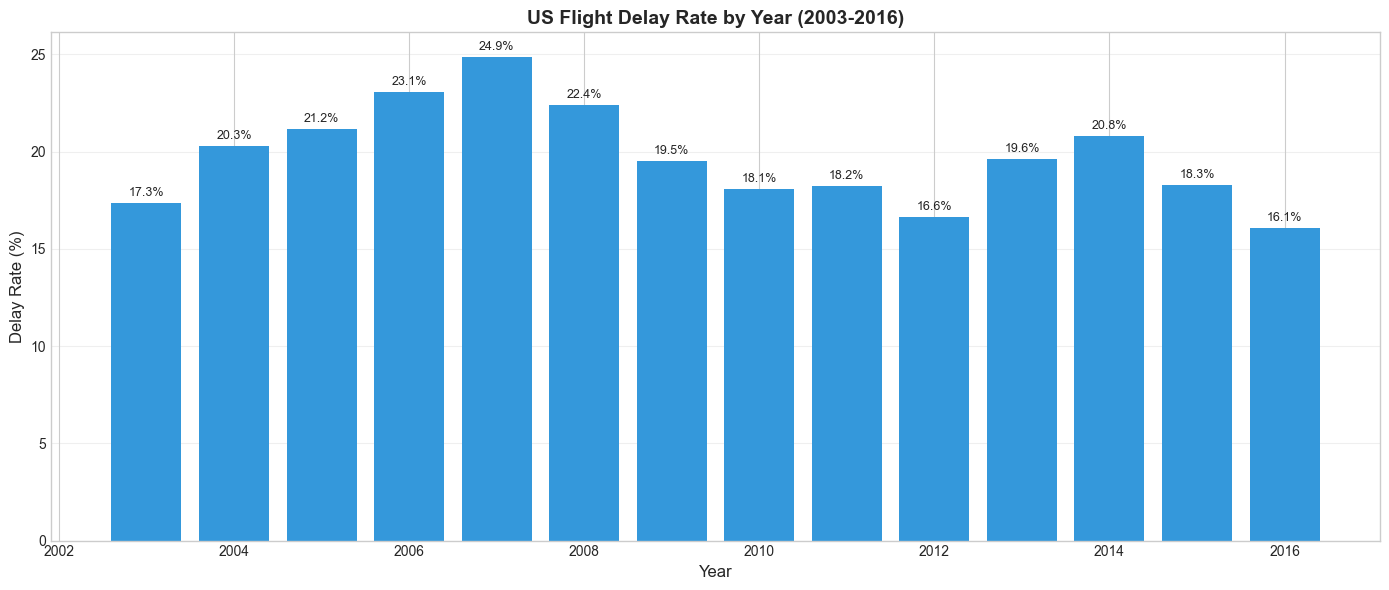

In [12]:
# Yearly delay trend
if df_clean is not None:
    fig, ax = plt.subplots(figsize=(14, 6))
    
    yearly = df_clean.groupby('YEAR').agg({
        'TOTAL_FLIGHTS': 'sum',
        'DELAYED': 'sum'
    })
    yearly['DELAY_RATE'] = yearly['DELAYED'] / yearly['TOTAL_FLIGHTS'] * 100
    
    bars = ax.bar(yearly.index, yearly['DELAY_RATE'], color=COLORS[0])
    
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Delay Rate (%)', fontsize=12)
    ax.set_title('US Flight Delay Rate by Year (2003-2016)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', (bar.get_x() + bar.get_width()/2, height),
                   textcoords='offset points', xytext=(0, 5), ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '01_yearly_delay_trend.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.2 Monthly Delay Pattern

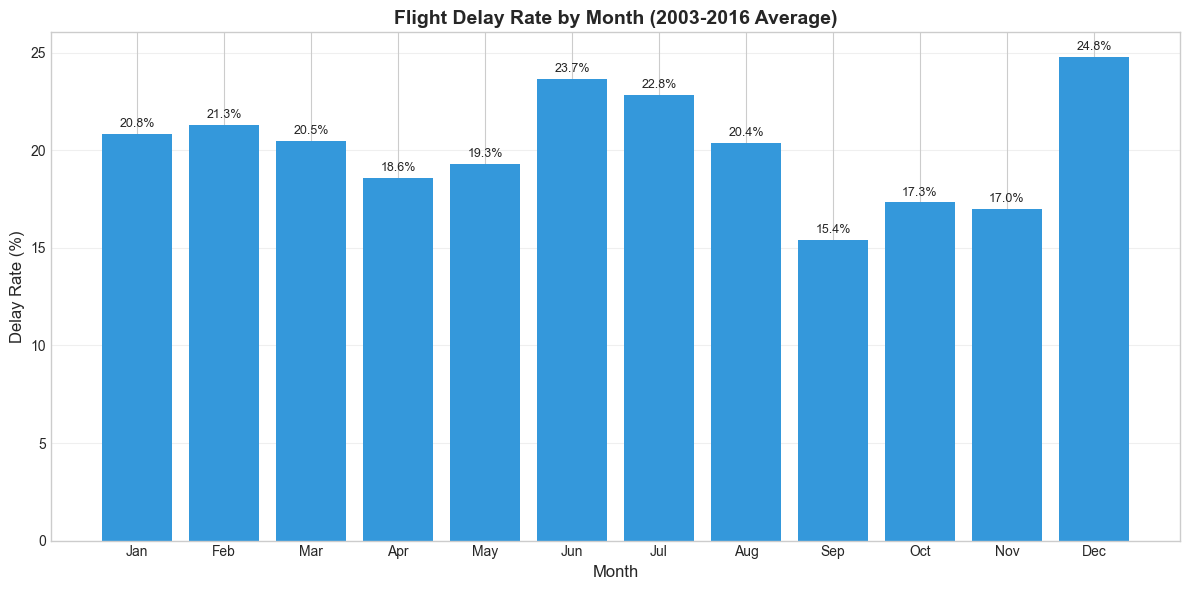

In [13]:
# Monthly delay pattern
if df_clean is not None:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    monthly = df_clean.groupby('MONTH').agg({
        'TOTAL_FLIGHTS': 'sum',
        'DELAYED': 'sum'
    })
    monthly['DELAY_RATE'] = monthly['DELAYED'] / monthly['TOTAL_FLIGHTS'] * 100
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    bars = ax.bar(range(1, 13), monthly['DELAY_RATE'], color=COLORS[0])
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_names)
    
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Delay Rate (%)', fontsize=12)
    ax.set_title('Flight Delay Rate by Month (2003-2016 Average)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', (bar.get_x() + bar.get_width()/2, height),
                   textcoords='offset points', xytext=(0, 5), ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '02_monthly_pattern.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.3 Top Airports by Flight Volume and Delays

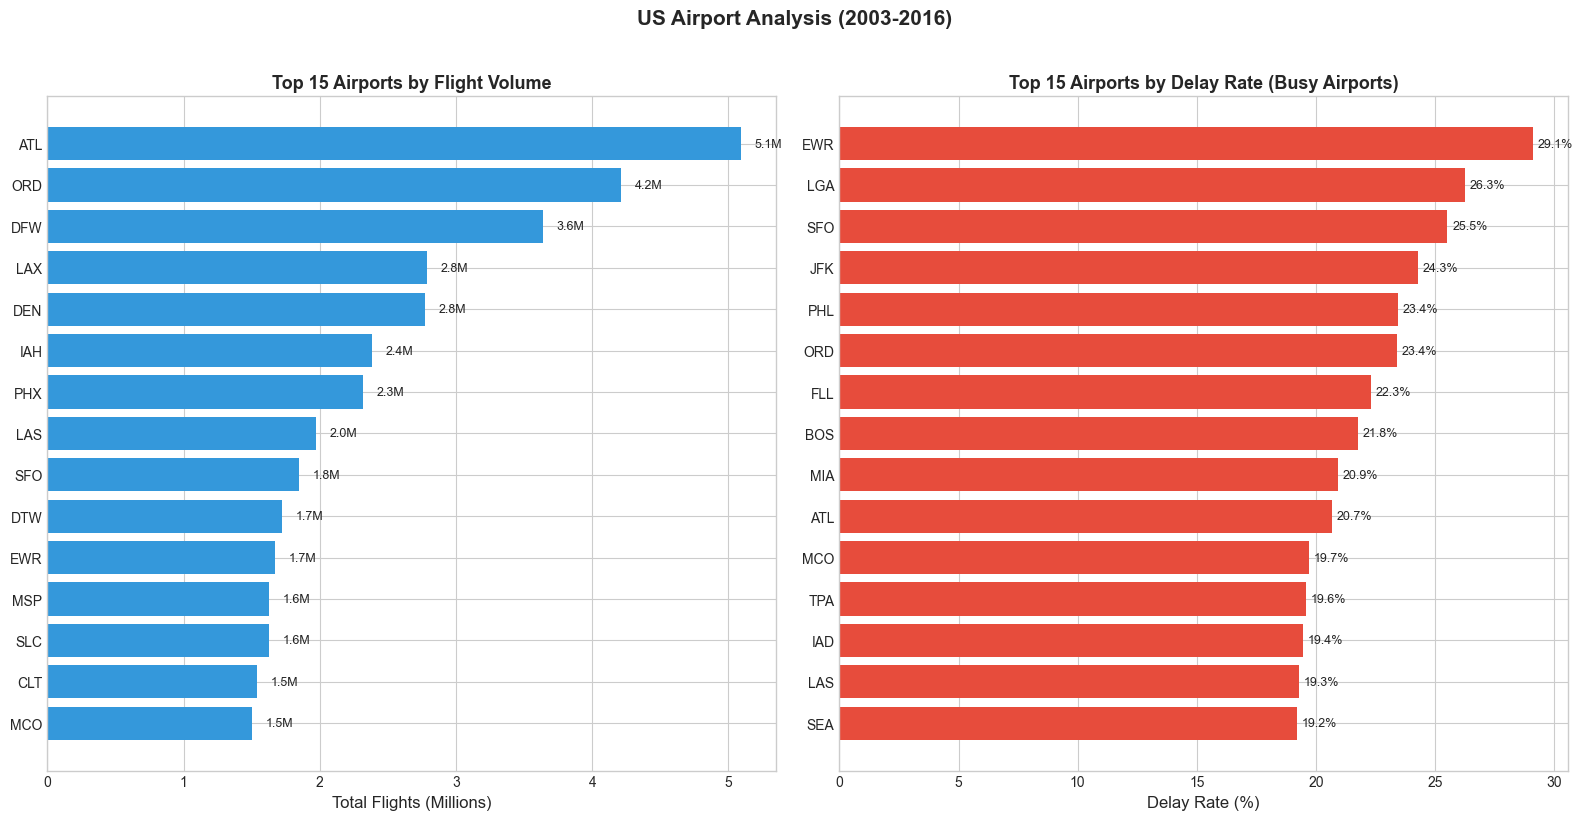

In [14]:
# Airport analysis
if df_clean is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Airport stats
    airport_stats = df_clean.groupby('AIRPORT_CODE').agg({
        'TOTAL_FLIGHTS': 'sum',
        'DELAYED': 'sum'
    })
    airport_stats['DELAY_RATE'] = airport_stats['DELAYED'] / airport_stats['TOTAL_FLIGHTS'] * 100
    
    # Top 15 by volume
    top_volume = airport_stats.sort_values('TOTAL_FLIGHTS', ascending=False).head(15)
    
    bars1 = axes[0].barh(range(len(top_volume)), top_volume['TOTAL_FLIGHTS'] / 1000000, color=COLORS[0])
    axes[0].set_yticks(range(len(top_volume)))
    axes[0].set_yticklabels(top_volume.index)
    axes[0].invert_yaxis()
    axes[0].set_xlabel('Total Flights (Millions)', fontsize=12)
    axes[0].set_title('Top 15 Airports by Flight Volume', fontsize=13, fontweight='bold')
    
    for bar, val in zip(bars1, top_volume['TOTAL_FLIGHTS'] / 1000000):
        axes[0].text(val + 0.1, bar.get_y() + bar.get_height()/2, f'{val:.1f}M', 
                    va='center', fontsize=9)
    
    # Top 15 by delay rate (among busy airports)
    busy_airports = airport_stats[airport_stats['TOTAL_FLIGHTS'] > 500000]  # Filter small airports
    top_delay = busy_airports.sort_values('DELAY_RATE', ascending=False).head(15)
    
    bars2 = axes[1].barh(range(len(top_delay)), top_delay['DELAY_RATE'], color=COLORS[1])
    axes[1].set_yticks(range(len(top_delay)))
    axes[1].set_yticklabels(top_delay.index)
    axes[1].invert_yaxis()
    axes[1].set_xlabel('Delay Rate (%)', fontsize=12)
    axes[1].set_title('Top 15 Airports by Delay Rate (Busy Airports)', fontsize=13, fontweight='bold')
    
    for bar, val in zip(bars2, top_delay['DELAY_RATE']):
        axes[1].text(val + 0.2, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', 
                    va='center', fontsize=9)
    
    plt.suptitle('US Airport Analysis (2003-2016)', fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '03_airport_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.4 Delay Causes Analysis

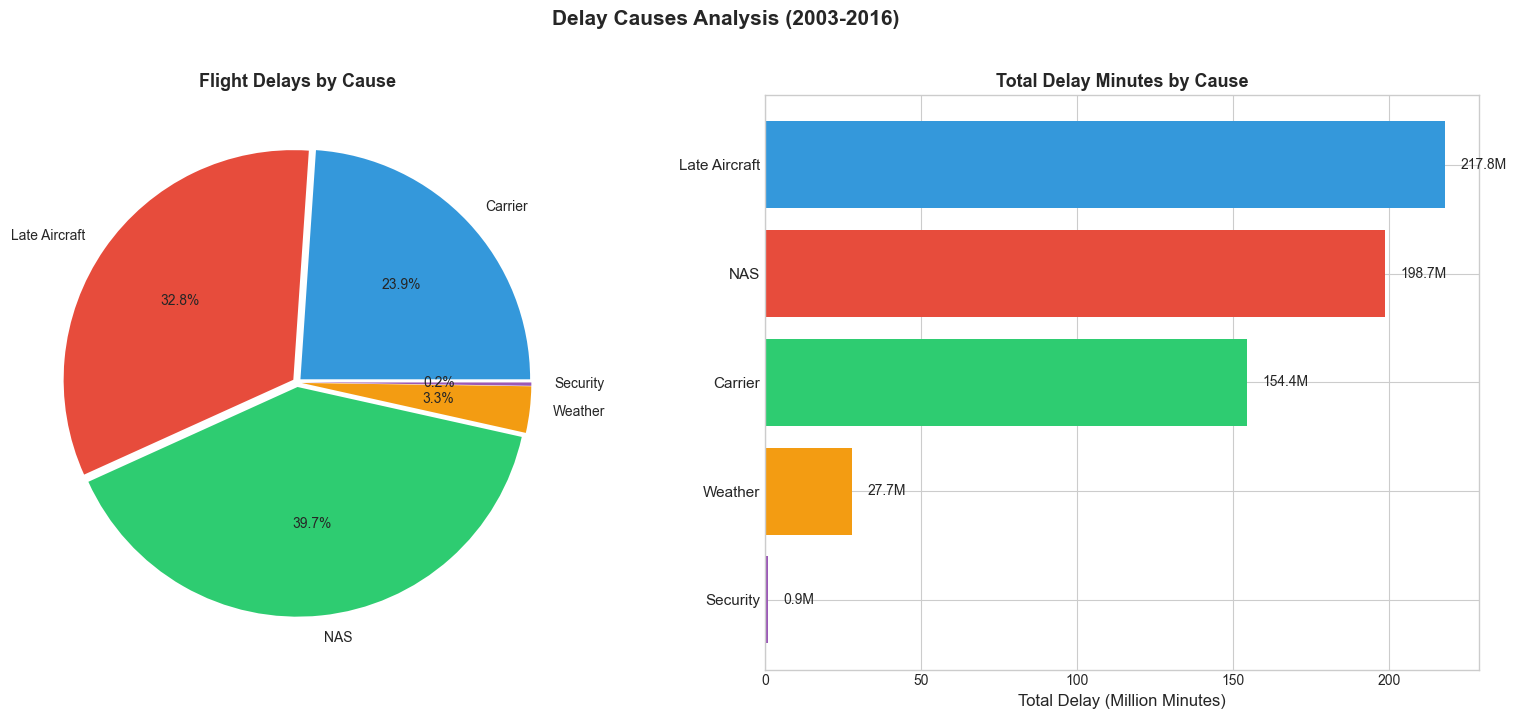

In [15]:
# Delay causes analysis
if df_clean is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Delay counts by cause
    delay_causes = {
        'Carrier': df_clean['CARRIER_DELAY_COUNT'].sum(),
        'Late Aircraft': df_clean['LATE_AIRCRAFT_DELAY_COUNT'].sum(),
        'NAS': df_clean['NAS_DELAY_COUNT'].sum(),
        'Weather': df_clean['WEATHER_DELAY_COUNT'].sum(),
        'Security': df_clean['SECURITY_DELAY_COUNT'].sum()
    }
    
    delay_minutes = {
        'Carrier': df_clean['CARRIER_DELAY_MIN'].sum() / 1000000,
        'Late Aircraft': df_clean['LATE_AIRCRAFT_DELAY_MIN'].sum() / 1000000,
        'NAS': df_clean['NAS_DELAY_MIN'].sum() / 1000000,
        'Weather': df_clean['WEATHER_DELAY_MIN'].sum() / 1000000,
        'Security': df_clean['SECURITY_DELAY_MIN'].sum() / 1000000
    }
    
    # Pie chart for delay count distribution
    labels = list(delay_causes.keys())
    sizes = list(delay_causes.values())
    colors_pie = COLORS[:len(labels)]
    
    wedges, texts, autotexts = axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', 
                                           colors=colors_pie, explode=[0.02]*len(labels))
    axes[0].set_title('Flight Delays by Cause', fontsize=13, fontweight='bold')
    
    # Bar chart for delay minutes
    sorted_causes = sorted(delay_minutes.items(), key=lambda x: x[1], reverse=True)
    labels = [x[0] for x in sorted_causes]
    values = [x[1] for x in sorted_causes]
    
    bars = axes[1].barh(range(len(labels)), values, color=COLORS[:len(labels)])
    axes[1].set_yticks(range(len(labels)))
    axes[1].set_yticklabels(labels, fontsize=11)
    axes[1].invert_yaxis()
    axes[1].set_xlabel('Total Delay (Million Minutes)', fontsize=12)
    axes[1].set_title('Total Delay Minutes by Cause', fontsize=13, fontweight='bold')
    
    for bar, val in zip(bars, values):
        axes[1].text(val + 5, bar.get_y() + bar.get_height()/2, f'{val:.1f}M', 
                    va='center', fontsize=10)
    
    plt.suptitle('Delay Causes Analysis (2003-2016)', fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '04_delay_causes.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.5 Flight Performance Distribution

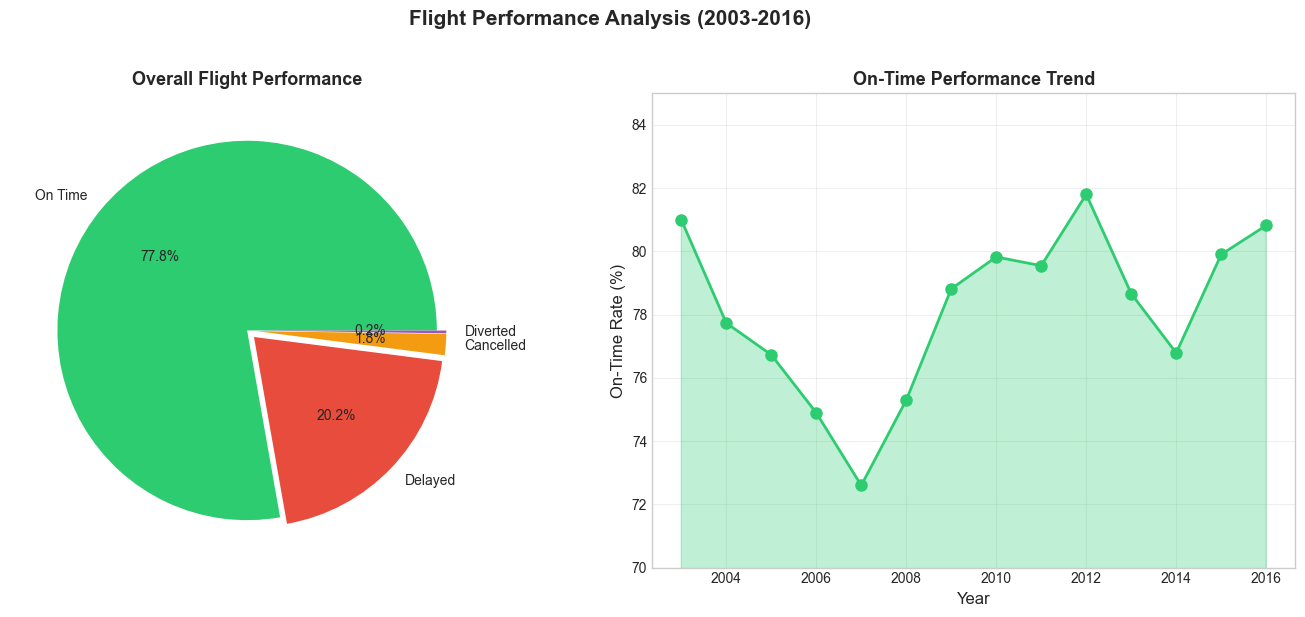

In [16]:
# Flight performance distribution
if df_clean is not None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Overall on-time vs delayed vs cancelled
    total_on_time = df_clean['ON_TIME'].sum()
    total_delayed = df_clean['DELAYED'].sum()
    total_cancelled = df_clean['CANCELLED'].sum()
    total_diverted = df_clean['DIVERTED'].sum()
    
    labels = ['On Time', 'Delayed', 'Cancelled', 'Diverted']
    sizes = [total_on_time, total_delayed, total_cancelled, total_diverted]
    colors_pie = [COLORS[2], COLORS[1], COLORS[3], COLORS[4]]
    explode = [0, 0.05, 0.05, 0.05]
    
    axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors_pie, explode=explode)
    axes[0].set_title('Overall Flight Performance', fontsize=13, fontweight='bold')
    
    # Year-over-year on-time performance
    yearly = df_clean.groupby('YEAR').agg({
        'TOTAL_FLIGHTS': 'sum',
        'ON_TIME': 'sum'
    })
    yearly['ON_TIME_RATE'] = yearly['ON_TIME'] / yearly['TOTAL_FLIGHTS'] * 100
    
    axes[1].plot(yearly.index, yearly['ON_TIME_RATE'], marker='o', linewidth=2, 
                 markersize=8, color=COLORS[2])
    axes[1].fill_between(yearly.index, yearly['ON_TIME_RATE'], alpha=0.3, color=COLORS[2])
    axes[1].set_xlabel('Year', fontsize=12)
    axes[1].set_ylabel('On-Time Rate (%)', fontsize=12)
    axes[1].set_title('On-Time Performance Trend', fontsize=13, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim(70, 85)
    
    plt.suptitle('Flight Performance Analysis (2003-2016)', fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '05_flight_performance.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.6 Cancellation Analysis

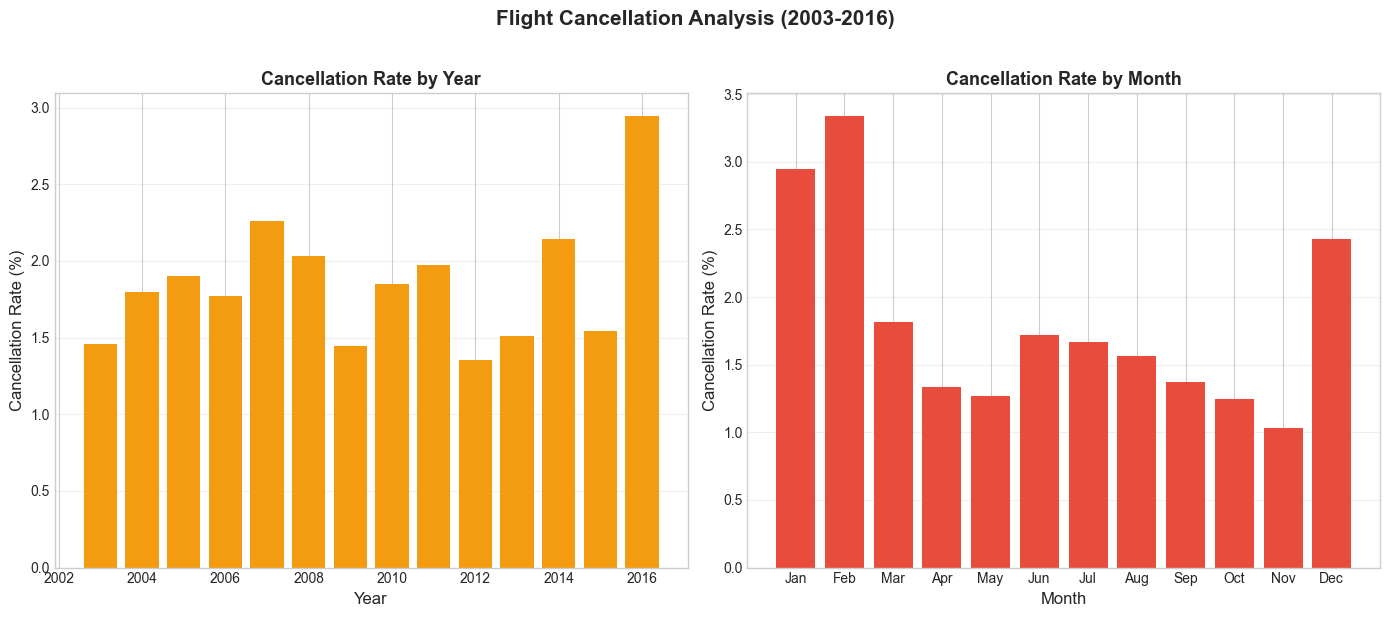

In [17]:
# Cancellation analysis
if df_clean is not None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Cancellation by year
    yearly_cancel = df_clean.groupby('YEAR').agg({
        'TOTAL_FLIGHTS': 'sum',
        'CANCELLED': 'sum'
    })
    yearly_cancel['CANCEL_RATE'] = yearly_cancel['CANCELLED'] / yearly_cancel['TOTAL_FLIGHTS'] * 100
    
    axes[0].bar(yearly_cancel.index, yearly_cancel['CANCEL_RATE'], color=COLORS[3])
    axes[0].set_xlabel('Year', fontsize=12)
    axes[0].set_ylabel('Cancellation Rate (%)', fontsize=12)
    axes[0].set_title('Cancellation Rate by Year', fontsize=13, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Cancellation by month
    monthly_cancel = df_clean.groupby('MONTH').agg({
        'TOTAL_FLIGHTS': 'sum',
        'CANCELLED': 'sum'
    })
    monthly_cancel['CANCEL_RATE'] = monthly_cancel['CANCELLED'] / monthly_cancel['TOTAL_FLIGHTS'] * 100
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    axes[1].bar(range(1, 13), monthly_cancel['CANCEL_RATE'], color=COLORS[1])
    axes[1].set_xticks(range(1, 13))
    axes[1].set_xticklabels(month_names)
    axes[1].set_xlabel('Month', fontsize=12)
    axes[1].set_ylabel('Cancellation Rate (%)', fontsize=12)
    axes[1].set_title('Cancellation Rate by Month', fontsize=13, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Flight Cancellation Analysis (2003-2016)', fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '06_cancellation_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.7 Delay Causes Trend Over Time

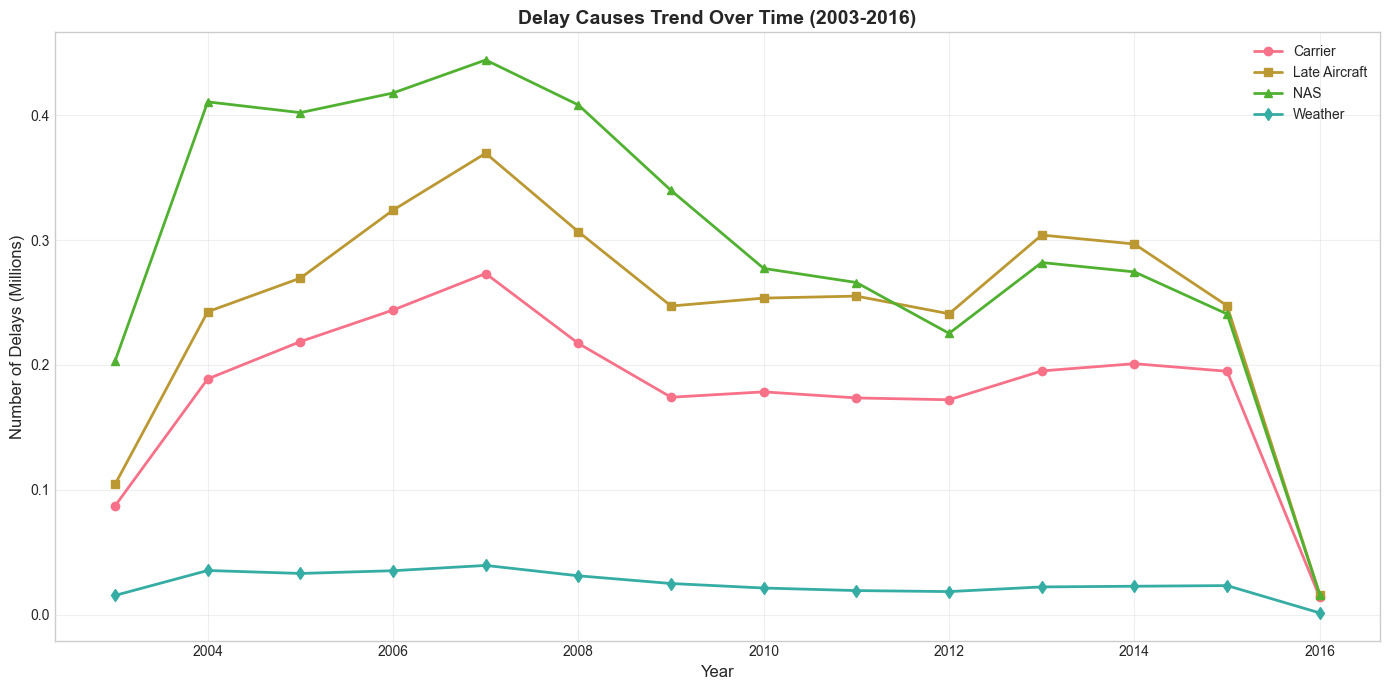

In [18]:
# Delay causes trend over time
if df_clean is not None:
    fig, ax = plt.subplots(figsize=(14, 7))
    
    yearly_causes = df_clean.groupby('YEAR').agg({
        'CARRIER_DELAY_COUNT': 'sum',
        'LATE_AIRCRAFT_DELAY_COUNT': 'sum',
        'NAS_DELAY_COUNT': 'sum',
        'WEATHER_DELAY_COUNT': 'sum',
        'SECURITY_DELAY_COUNT': 'sum'
    }) / 1000000  # Convert to millions
    
    ax.plot(yearly_causes.index, yearly_causes['CARRIER_DELAY_COUNT'], 
            marker='o', label='Carrier', linewidth=2)
    ax.plot(yearly_causes.index, yearly_causes['LATE_AIRCRAFT_DELAY_COUNT'], 
            marker='s', label='Late Aircraft', linewidth=2)
    ax.plot(yearly_causes.index, yearly_causes['NAS_DELAY_COUNT'], 
            marker='^', label='NAS', linewidth=2)
    ax.plot(yearly_causes.index, yearly_causes['WEATHER_DELAY_COUNT'], 
            marker='d', label='Weather', linewidth=2)
    
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Number of Delays (Millions)', fontsize=12)
    ax.set_title('Delay Causes Trend Over Time (2003-2016)', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '07_delay_causes_trend.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

## 7. Export Data for Tableau

In [19]:
# Export yearly summary
if df_clean is not None:
    yearly_summary = df_clean.groupby('YEAR').agg({
        'TOTAL_FLIGHTS': 'sum',
        'ON_TIME': 'sum',
        'DELAYED': 'sum',
        'CANCELLED': 'sum',
        'DIVERTED': 'sum',
        'TOTAL_DELAY_MIN': 'sum',
        'CARRIER_DELAY_COUNT': 'sum',
        'LATE_AIRCRAFT_DELAY_COUNT': 'sum',
        'NAS_DELAY_COUNT': 'sum',
        'WEATHER_DELAY_COUNT': 'sum',
        'SECURITY_DELAY_COUNT': 'sum'
    })
    yearly_summary['DELAY_RATE'] = (yearly_summary['DELAYED'] / yearly_summary['TOTAL_FLIGHTS'] * 100).round(2)
    yearly_summary['ON_TIME_RATE'] = (yearly_summary['ON_TIME'] / yearly_summary['TOTAL_FLIGHTS'] * 100).round(2)
    yearly_summary.to_csv(TABLEAU_DIR / 'yearly_summary_tableau.csv')
    print(f'Exported yearly summary: {len(yearly_summary)} rows')

Exported yearly summary: 14 rows


In [20]:
# Export monthly summary
if df_clean is not None:
    monthly_summary = df_clean.groupby(['YEAR', 'MONTH', 'MONTH_NAME']).agg({
        'TOTAL_FLIGHTS': 'sum',
        'ON_TIME': 'sum',
        'DELAYED': 'sum',
        'CANCELLED': 'sum',
        'TOTAL_DELAY_MIN': 'sum'
    }).reset_index()
    monthly_summary['DELAY_RATE'] = (monthly_summary['DELAYED'] / monthly_summary['TOTAL_FLIGHTS'] * 100).round(2)
    monthly_summary.to_csv(TABLEAU_DIR / 'monthly_summary_tableau.csv', index=False)
    print(f'Exported monthly summary: {len(monthly_summary)} rows')

Exported monthly summary: 152 rows


In [21]:
# Export airport summary
if df_clean is not None:
    airport_summary = df_clean.groupby(['AIRPORT_CODE', 'AIRPORT_NAME']).agg({
        'TOTAL_FLIGHTS': 'sum',
        'ON_TIME': 'sum',
        'DELAYED': 'sum',
        'CANCELLED': 'sum',
        'TOTAL_DELAY_MIN': 'sum'
    }).reset_index()
    airport_summary['DELAY_RATE'] = (airport_summary['DELAYED'] / airport_summary['TOTAL_FLIGHTS'] * 100).round(2)
    airport_summary = airport_summary.sort_values('TOTAL_FLIGHTS', ascending=False)
    airport_summary.to_csv(TABLEAU_DIR / 'airport_summary_tableau.csv', index=False)
    print(f'Exported airport summary: {len(airport_summary)} rows')

Exported airport summary: 29 rows


In [22]:
# Export delay causes summary
if df_clean is not None:
    causes_data = []
    cause_cols = [
        ('Carrier', 'CARRIER_DELAY_COUNT', 'CARRIER_DELAY_MIN'),
        ('Late Aircraft', 'LATE_AIRCRAFT_DELAY_COUNT', 'LATE_AIRCRAFT_DELAY_MIN'),
        ('NAS (Air Traffic)', 'NAS_DELAY_COUNT', 'NAS_DELAY_MIN'),
        ('Weather', 'WEATHER_DELAY_COUNT', 'WEATHER_DELAY_MIN'),
        ('Security', 'SECURITY_DELAY_COUNT', 'SECURITY_DELAY_MIN')
    ]
    
    for cause, count_col, min_col in cause_cols:
        causes_data.append({
            'cause': cause,
            'delay_count': df_clean[count_col].sum(),
            'delay_minutes': df_clean[min_col].sum()
        })
    
    causes_df = pd.DataFrame(causes_data)
    causes_df['percentage'] = (causes_df['delay_count'] / causes_df['delay_count'].sum() * 100).round(2)
    causes_df.to_csv(TABLEAU_DIR / 'delay_causes_tableau.csv', index=False)
    print(f'Exported delay causes: {len(causes_df)} rows')
    display(causes_df)

Exported delay causes: 5 rows


,cause,delay_count,delay_minutes,percentage
0,Carrier,2532980,154374198,23.92
1,Late Aircraft,3478260,217800492,32.85
2,NAS (Air Traffic),4207790,198699892,39.74
3,Weather,344780,27668940,3.26
4,Security,24577,933481,0.23


## 8. Key Findings

In [23]:
print('=' * 70)
print('KEY FINDINGS - AIRLINE FLIGHT DELAY ANALYSIS (USA) - 2003-2016')
print('=' * 70)

if df_clean is not None:
    total_flights = df_clean['TOTAL_FLIGHTS'].sum()
    total_delayed = df_clean['DELAYED'].sum()
    total_cancelled = df_clean['CANCELLED'].sum()
    
    print(f'\n1. OVERALL PERFORMANCE')
    print(f'   - Total flights analyzed: {total_flights:,}')
    print(f'   - Overall delay rate: {total_delayed/total_flights*100:.1f}%')
    print(f'   - Overall cancellation rate: {total_cancelled/total_flights*100:.2f}%')
    
    # Busiest airport
    airport_totals = df_clean.groupby('AIRPORT_CODE')['TOTAL_FLIGHTS'].sum()
    busiest = airport_totals.idxmax()
    print(f'\n2. BUSIEST AIRPORT')
    print(f'   - {busiest}: {airport_totals[busiest]:,} flights')
    
    # Worst month for delays
    monthly = df_clean.groupby('MONTH').agg({'TOTAL_FLIGHTS': 'sum', 'DELAYED': 'sum'})
    monthly['DELAY_RATE'] = monthly['DELAYED'] / monthly['TOTAL_FLIGHTS'] * 100
    worst_month = monthly['DELAY_RATE'].idxmax()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    print(f'\n3. WORST MONTH FOR DELAYS')
    print(f'   - {month_names[worst_month-1]} ({monthly.loc[worst_month, "DELAY_RATE"]:.1f}% delay rate)')
    
    # Main delay cause
    delay_causes = {
        'Carrier': df_clean['CARRIER_DELAY_COUNT'].sum(),
        'Late Aircraft': df_clean['LATE_AIRCRAFT_DELAY_COUNT'].sum(),
        'NAS': df_clean['NAS_DELAY_COUNT'].sum(),
        'Weather': df_clean['WEATHER_DELAY_COUNT'].sum(),
        'Security': df_clean['SECURITY_DELAY_COUNT'].sum()
    }
    main_cause = max(delay_causes, key=delay_causes.get)
    total_delay_count = sum(delay_causes.values())
    print(f'\n4. PRIMARY DELAY CAUSE')
    print(f'   - {main_cause}: {delay_causes[main_cause]/total_delay_count*100:.1f}% of all delays')
    
    print(f'\n5. DATA SOURCE')
    print(f'   - Bureau of Transportation Statistics (BTS)')
    print(f'   - CORGIS Dataset Project')

print('\n' + '=' * 70)

KEY FINDINGS - AIRLINE FLIGHT DELAY ANALYSIS (USA) - 2003-2016

1. OVERALL PERFORMANCE
   - Total flights analyzed: 52,445,768
   - Overall delay rate: 20.2%
   - Overall cancellation rate: 1.79%

2. BUSIEST AIRPORT
   - ATL: 5,092,841 flights

3. WORST MONTH FOR DELAYS
   - Dec (24.8% delay rate)

4. PRIMARY DELAY CAUSE
   - NAS: 39.7% of all delays

5. DATA SOURCE
   - Bureau of Transportation Statistics (BTS)
   - CORGIS Dataset Project



## 9. Recommendations

In [24]:
print('RECOMMENDATIONS')
print('-' * 40)
print('''
Based on the 2003-2016 analysis, the following recommendations are suggested:

1. TRAVEL TIMING
   - Avoid booking flights in summer months (June-August) when delay rates peak
   - September-November typically have better on-time performance
   - February has high cancellation rates due to winter weather

2. AIRPORT SELECTION
   - Major hubs like ATL, ORD, DFW handle high volume but have varying delay rates
   - Consider alternate airports in the same metro area when available
   - Check airport-specific delay statistics before booking

3. DELAY CAUSE AWARENESS
   - Late aircraft delays are the leading cause - cascading from earlier delays
   - NAS (air traffic control) delays are significant at busy airports
   - Weather delays are seasonal and regional - plan accordingly

4. FOR AIRLINES
   - Focus on reducing late aircraft cascading delays
   - Improve turnaround efficiency at hub airports
   - Better weather contingency planning for winter months

5. FOR AIRPORTS
   - Invest in capacity improvements to reduce NAS delays
   - Optimize gate utilization to reduce aircraft delays
   - Enhanced communication during weather events
''')

RECOMMENDATIONS
----------------------------------------

Based on the 2003-2016 analysis, the following recommendations are suggested:

1. TRAVEL TIMING
   - Avoid booking flights in summer months (June-August) when delay rates peak
   - September-November typically have better on-time performance
   - February has high cancellation rates due to winter weather

2. AIRPORT SELECTION
   - Major hubs like ATL, ORD, DFW handle high volume but have varying delay rates
   - Consider alternate airports in the same metro area when available
   - Check airport-specific delay statistics before booking

3. DELAY CAUSE AWARENESS
   - Late aircraft delays are the leading cause - cascading from earlier delays
   - NAS (air traffic control) delays are significant at busy airports
   - Weather delays are seasonal and regional - plan accordingly

4. FOR AIRLINES
   - Focus on reducing late aircraft cascading delays
   - Improve turnaround efficiency at hub airports
   - Better weather contingency plan

## 10. Summary

In [25]:
print('=' * 70)
print('ANALYSIS SUMMARY')
print('=' * 70)
print('''
This analysis examined airline flight delays in the United States
using data from 2003-2016 from the Bureau of Transportation Statistics.

Key aspects covered:
- Yearly delay trends and patterns
- Monthly and seasonal variations
- Airport performance comparison
- Delay cause breakdown (Carrier, Late Aircraft, NAS, Weather, Security)
- Cancellation patterns

Outputs generated:
- 7 visualizations (PNG files)
- 4 data exports for Tableau dashboards

Data Source: https://corgis-edu.github.io/corgis/csv/airlines/
''')
print('=' * 70)
print('\nAnalysis completed by: Ishak Islam')
print('Internship ID: UMID28072552431')
print('Program: Unified Mentor Internship')
print('=' * 70)

ANALYSIS SUMMARY

This analysis examined airline flight delays in the United States
using data from 2003-2016 from the Bureau of Transportation Statistics.

Key aspects covered:
- Yearly delay trends and patterns
- Monthly and seasonal variations
- Airport performance comparison
- Delay cause breakdown (Carrier, Late Aircraft, NAS, Weather, Security)
- Cancellation patterns

Outputs generated:
- 7 visualizations (PNG files)
- 4 data exports for Tableau dashboards

Data Source: https://corgis-edu.github.io/corgis/csv/airlines/


Analysis completed by: Ishak Islam
Internship ID: UMID28072552431
Program: Unified Mentor Internship
